In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

from preprocessing.preprocessor import Preprocessor
from models.voting_model import VotingModel

In [2]:
df = pd.read_csv(r"C:\Learn_AI\Model\Titanic_2\DataSet\titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [4]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [5]:
df['Age'].fillna(df['Age'].median() , inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace =True)

In [6]:
df['Family_total'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp' , 'Parch' , 'Cabin'] , axis = 1 , inplace = True)

In [7]:
df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_total
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1


In [8]:
df.describe()

,Survived,Pclass,Age,Fare,Family_total
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.346154,2.423077,27.729679,28.109587,2.012821
std,0.477275,0.795459,13.150938,39.401047,1.614400
min,0.000000,1.000000,0.830000,6.750000,1.000000
25%,0.000000,2.000000,21.000000,8.003150,1.000000
50%,0.000000,3.000000,26.000000,14.454200,1.000000
75%,1.000000,3.000000,33.000000,30.371850,2.000000
max,1.000000,3.000000,71.000000,263.000000,8.000000


<Axes: xlabel='Survived', ylabel='Age'>

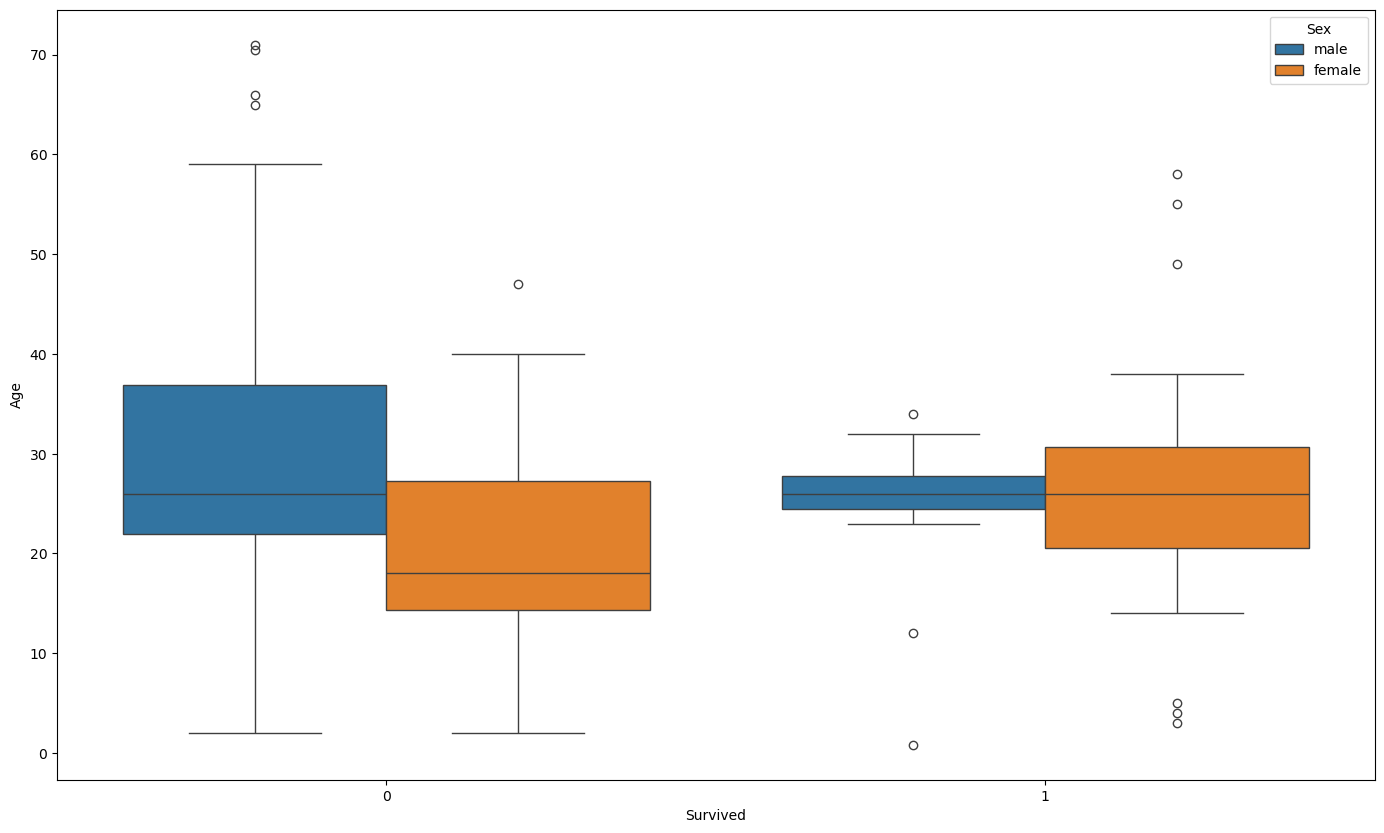

In [9]:
plt.figure(figsize = (17,10))
sns.boxplot(y = df['Age'] , x = df['Survived'] , hue = df['Sex'])


- Nữ sống sót nhiều hơn nam:

- Cột Survived = 1: Hộp màu cam (nữ) cao hơn nhiều.

- Nam sống sót có tuổi tập trung hẹp (~25-30), nữ sống sót tuổi trải dài hơn.

- Nam giới tử vong nhiều hơn:

- Cột Survived = 0: Hộp xanh (nam) lớn và nhiều outlier.

- Nhiều nam tử vong ở độ tuổi 20-40.

- Trẻ em và phụ nữ dễ sống sót hơn:

- Nữ sống sót nhiều ở mọi độ tuổi (thể hiện bằng hộp màu cam bên Survived = 1).

- Nam chỉ sống sót tập trung vào 1 nhóm nhỏ tuổi (hẹp).

- Phụ nữ có tỉ lệ sống sót cao hơn nam (đúng với chính sách Titanic: "Ladies and children first").

 - Nam giới, dù ở độ tuổi nào cũng dễ tử vong hơn.

 - Tuổi có ảnh hưởng nhẹ đến tỉ lệ sống sót, nhưng yếu tố giới tính rõ rệt hơn.

In [10]:
# Giá vé không ảnh hưởng nhiều 

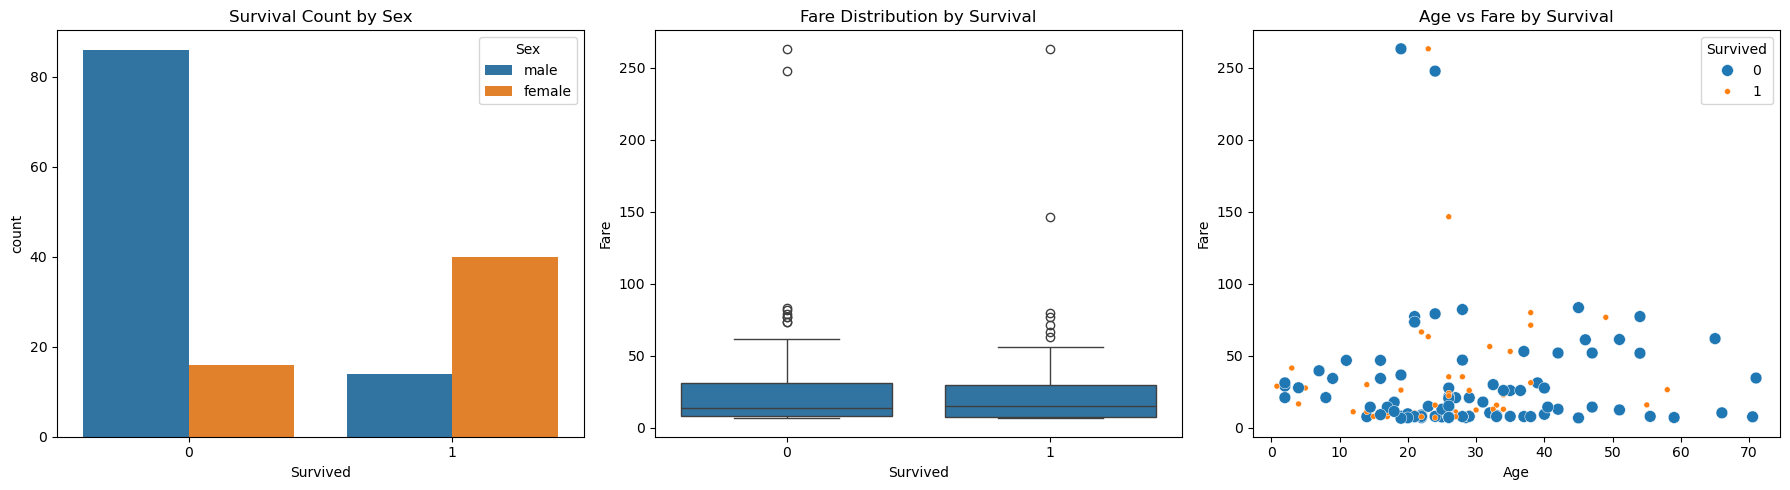

In [11]:
# Thiết lập bố cục cho 3 biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Survived', hue='Sex', data=df, ax=axes[0])
axes[0].set_title('Survival Count by Sex')

sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')

sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Survived', data=df, ax=axes[2])
axes[2].set_title('Age vs Fare by Survival')

plt.tight_layout()
plt.show()

- Giá vé không có sự khác biệt quá lớn giữa hai nhóm, nhưng người sống sót có xu hướng trả giá vé cao hơn một chút. Điều này có thể liên quan đến việc những người trả giá vé cao hơn thuộc lớp vé cao hơn (Pclass thấp hơn), vốn có khả năng sống sót cao hơn. Tuy nhiên, ảnh hưởng của giá vé không quá rõ ràng.

In [12]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_total
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2


In [13]:
standard_cols =['Age' , 'Fare']
categorical_cols = ['Sex', 'Embarked']

In [14]:
prep = Preprocessor(standard_cols=standard_cols, categorical_cols=categorical_cols)

In [15]:
model = VotingModel(prep)

In [16]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_total
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2


In [17]:
X = df.drop('Survived' , axis =1)
y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 2)

In [19]:
model.fit(X_train, y_train)

In [20]:
print("Accuracy trên tập test:", model.score(X_test, y_test))
print("Best parameters:", model.best_params())

Accuracy trên tập test: 0.875
Best parameters: {'voting__knn__n_neighbors': 3, 'voting__rf__max_depth': None, 'voting__rf__n_estimators': 50}


In [21]:
print(model.report(X_test , y_test))
print(model.cm(X_test , y_test))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.82      0.82      0.82        11

    accuracy                           0.88        32
   macro avg       0.86      0.86      0.86        32
weighted avg       0.88      0.88      0.88        32

[[19  2]
 [ 2  9]]
